# MAE6226 Homework 3
Li Lin Jan.30,2016

In [291]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
size = 1000.0
x0,xn = -4.0,4.0
y0,yn = -4.0,4.0
x = np.linspace(x0,xn,size)
y = -np.linspace(y0,yn,size)
X,Y = np.meshgrid(x,y)

In [292]:
def velocity_field (s, xs, ys, X, Y):
    
    """
    Return a source/sink velocity filed, where
    s - source/sink strength
    xs - source/sink x position
    ys - source/sink y position
    X - mesh data x
    Y - mesh data Y
    """
    
    u = s/(2*math.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = s/(2*math.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u,v

In [293]:
def stream_function (s, xs, ys, X, Y):
    
    """
    Return a stream function of a source/sink, where
    s - source/sink strength
    xs - source/sink x position
    ys - source/sink y position
    X - mesh data x
    Y - mesh data Y
    """
    
    psi = s/(2*math.pi)*np.arctan2((Y-ys),(X-xs))
    
    return psi

In [294]:
def ct (n, N, size):
    
    """
    Translate real coodinates (x and y) to matrix coodinates (col# and row#), using int() instead of interpolation, 
    where
    n - real coodinates input
    N - real coodinates axis limit
    size - array size
    """
    
    co = int(size/2-n/N*(size/2))-1

    return co

## Problem 1

In [295]:
sso = 2.0 # Source Strength
xso1, yso1 = -2.0, 0.0 # Source 1 location
ssi = -2.0 # Sink Strength
xsi1, ysi1 = 2.0, 0.0 # Sink 1 location

In [296]:
uso1, vso1 = velocity_field(sso, xso1, yso1, X, Y)
usi1, vsi1 = velocity_field(ssi, xsi1, ysi1, X, Y)
u = uso1+usi1
v = vso1+vsi1
i = 4
N = 1000
velocity = 0
Q_value1 = 0
for j in range (N):
    velocity = u[ct(j/N*(2-(-2))+(-2), yn, size),ct(i, xn, size)]
    Q_value1 = Q_value1+velocity*(2-(-2))/N
print ('Q_value1=', Q_value1)

Q_value1= -0.294998318376


In [297]:
psio = stream_function(sso, xso1, yso1, X, Y)
psii = stream_function(ssi, xsi1, ysi1, X, Y)
psi = psio+psii
Q_value2 = psi[ct(2, yn, size), ct(4, xn, size)]-psi[ct(-2, yn, size), ct(4, xn, size)]
print ('Q_value2=', Q_value2)

Q_value2= -0.295293985764


Thus, for Question a, the flow calculated using intergraion is -0.29499, using stream functions is -0.29529 

In [298]:
psio = stream_function(sso, xso1, yso1, X, Y)
psii = stream_function(ssi, xsi1, ysi1, X, Y)
psi = psio+psii
i = 0
N = 1000
velocity = 0
Q_value1 = 0
for j in range (N):
    velocity = u[ct(j/N*(2-(-2))+(-2), yn, size),ct(i, xn, size)]
    Q_value1 = Q_value1+velocity*(2-(-2))/N
print ('Q_value1=', Q_value1)
Q_value2 = psi[ct(2, yn, size), ct(0, xn, size)]-psi[ct(-2, yn, size), ct(0, xn, size)]
print ('Q_value2=', Q_value2)

Q_value1= 0.999635452425
Q_value2= -0.999363061812


When go across 180 degrees, arctan2 start to deal the angel as negative, in other words, the output range for atan2 is -180 to 180. If use arctan, then there is no such a problem:

In [299]:
def corrected_stream_function (s, xs, ys, X, Y):
    """
    Corrected stream function using arctan().
    Return a stream function of a source/sink, where
    s - source/sink strength
    xs - source/sink x position
    ys - source/sink y position
    X - mesh data x
    Y - mesh data Y
    """
    psi = s/(2*math.pi)*np.arctan((Y-ys)/(X-xs))
    
    return psi

In [300]:
psio = corrected_stream_function(sso, xso1, yso1, X, Y)
psii = corrected_stream_function(ssi, xsi1, ysi1, X, Y)
psi = psio+psii
i = 0
N = 1000
velocity = 0
Q_value1 = 0
for j in range (N):
    velocity = u[ct(j/N*(2-(-2))+(-2), yn, size),ct(i, xn, size)]
    Q_value1 = Q_value1+velocity*(2-(-2))/N
print ('Q_value1=', Q_value1)
Q_value2 = psi[ct(2, yn, size), ct(0, xn, size)]-psi[ct(-2, yn, size), ct(0, xn, size)]
print ('Q_value2=', Q_value2)

Q_value1= 0.999635452425
Q_value2= 1.00063693819


## Problem 2

In the area behind the source (down stream), the flow rate between these two red streamlines is $\sigma = \Psi(B)-\Psi(A)$, and since the flow field in this area is seperated into two unifrom part with $\frac{1}2\sigma$ each, then it is obvious that $\Psi(B) = \frac{1}2\sigma$ and $\Psi(A) = -\frac{1}2\sigma$. Since the values do not change along their streamlines, the part on the left of the source has the same values. 

Another point of view is looking at the uniform flow field on the left. Take any streamline of that, say $\Psi(C)$, which is uniform before getting close the source and be pushed to above point B by the source. Then $\Psi(C)-\Psi(B) = \Psi(C)-\Psi(center)$, where $\Psi(center)$ is the center red line on the left of the source, and equals to $\frac{1}2\sigma$. Based on the symmetry, the opposite side streamline has a value of $-\frac{1}2\sigma$. The distance between these two lines are infinitesimal, since no fluid is really stopped and trapped at the stagnation point.

## Problem 3

Define the length $L = x-(-x) = 2x$, where $x$ and $-x$ is the x-axis coodinates of the stagnation points. Define $(-x_s,0)$ and $(x_s,0)$ is the coodinate of the source and sink. Then

$\Psi(x,y) = {U_\infty}y+\frac{\sigma}{2\pi}\mathrm{arctan}(\frac{y}{x+x_s})-\frac{\sigma}{2\pi}\mathrm{arctan}(\frac{y}{x+x_s})$.

note that $(\frac{y}{x+xs})(\frac{y}{x-xs}) = \frac{y^2}{x^2-{x_s}^2} > -1$, then

$\Psi(x,y) = {U_\infty}y+\frac{\sigma}{2\pi}\mathrm{arctan}(\frac{\frac{y}{x+xs}-\frac{y}{x-xs}}{1+\frac{y^2}{x^2-{x_s}^2}}) = {U_\infty}y+\frac{\sigma}{2\pi}\mathrm{arctan}(\frac{-2yx_s}{x^2-{x_s}^2+y^2})$.

Then we have the expression of the velocity:

$u = \frac{\partial\Psi}{{\partial}y} = U_\infty+\frac{\sigma}{2\pi}\frac{-2x^2x_s+2{x_s}^3+2x_sy^2}{x^4+{x_s}^4+y^4-2x^2{x_s}^2+sx^2y^2+2{x_s}^2y^2} = U_\infty+\frac{\sigma}{2\pi}[\frac{x+x_s}{(x+x_s)^2+y^2}-\frac{x-x_s}{(x-x_s)^2+y^2}]$,

and $v = -\frac{\partial\Psi}{{\partial}x} = \frac{\sigma}{2\pi}\frac{4xyx_s}{y^4+2{x_s}^2y^2+2x^2y^2+{x_s}^4+x^4-2x^2{x_s}^2} = \frac{\sigma}{2\pi}y[\frac{1}{(x+x_s)^2+y^2}-\frac{1}{(x-x_s)^2+y^2}]$.

To find the stagnation points, we need $u = v = 0$. Obviously, when $y = 0$, $v = 0$. Substitude $y = 0$ into the expression of $u$ and make $u = 0$, we have:

$u = U_\infty+\frac{\sigma}{2\pi}(\frac{1}{x+x_s}-\frac{1}{x-x_s}) = 0$.

Solve it and yield: $x = \sqrt{{x_s}^2+\frac{2\frac{\sigma}{2\pi}x_s}{U_\infty}} = x_s\sqrt{1+\frac{\sigma}{\pi{x_s}U_\infty}}$

To find the width of Rankine Oval, say $W = 2h$, where $h$ is the coodinate of its top and bottom, we need to substitude $x = 0$ into the expression of $u$, that

$u = U_\infty+\frac{\sigma}{2\pi}\frac{2x_s}{{x_s}^2+y^2}$, 

and then take its integral from $-h$ to $h$ which equals to the flow rate $\sigma$ accrosses this center line, that 

$\int_{-h}^h \! u(y) \, \mathrm{d}y = 2hU_\infty+\frac{\sigma}{\pi}(\mathrm{arctan}\frac{h}{x_s}-\mathrm{arctan}\frac{-h}{x_s}) = \sigma$.

Again, since $(\frac{h}{x_s})(\frac{-h}{x_s}) > -1$,

the equation can be rewritten as:

$2hU_\infty+\frac{\sigma}{\pi}\mathrm{arctan}\frac{2hx_s}{{x_s}^2-h^2} = \sigma$.

Solve for $h$:

$h = \frac{h^2-{x_s}^2}{2x_s}\mathrm{tan}\frac{2{\pi}hU_\infty}{\sigma}$.

$h$ can be found by iteration or enumeration.

In [301]:
def Rankine_Oval (sigma, xs, u_inf, X, Y, size, xn, x0, yn, y0):
    
    """
    Find the length and width of a Rankine Oval, where
    sigma - Source or sink strength
    xs - Source or sink x axis position
    u_inf - U infinity
    X - mesh data x
    Y - mesh data Y
    size - array size
    xn, x0, yn, y0 - x axis and y axis limit
    """
    
    sso = sigma # Source Strength
    xso1, yso1 = -xs, 0.0 # Source 1 location
    ssi = -sigma # Sink Strength
    xsi1, ysi1 = xs, 0.0 # Sink 1 location
    uso1, vso1 = velocity_field(sso, xso1, yso1, X, Y)
    usi1, vsi1 = velocity_field(ssi, xsi1, ysi1, X, Y)
    u_freestream = u_inf*np.ones((size, size), dtype = float)
    v_freestream = np.zeros((size, size))
    u = uso1+usi1+u_freestream
    v = vso1+vsi1+v_freestream
    fsize = 10
    plt.figure(figsize = (fsize,(yn-y0)/(xn-x0)*fsize/2))
    plt.xlabel('x', fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.xlim(x0, xn)
    plt.ylim(y0, yn)
    plt.streamplot(X, Y, u, v, density = 4, linewidth = 0.3, arrowsize = 1, arrowstyle = '->')
    plt.scatter(xso1, yso1, color = 'red', s = 20, marker = 'o', linewidth = 0)
    plt.scatter(xsi1, ysi1, color = 'green', s = 20, marker = 'o', linewidth = 0)
    psio = stream_function(sso, xso1, yso1, X, Y)
    psii = stream_function(ssi, xsi1, ysi1, X, Y)
    psi_freestream = u_inf * Y
    psi = psi_freestream+psio+psii
    plt.contour(X, Y, psi, levels=[0.], colors='red', linewidths=2, linestyles='solid');
    plt.grid('on')
    
    x_stag = xs*math.sqrt(1+sigma/math.pi/xs/u_inf)
    print ('L = ', 2*x_stag)
    
    error = 1.
    h = 0.1*x_stag
    N = 1000
    dh = (x_stag-0.1*x_stag)/N
    temp = np.zeros(N)
    error = np.ones(N)
    for n in range (N):
        temp[n] = abs((h**2.-xs**2.)/(2.*xs)*math.tan(2.*math.pi*h*u_inf/sigma)-h)
        h = h+dh
    temp[0] = 1
    
    h = abs(min(range(len(temp)), key=temp.__getitem__)*dh)
    print ('W = ', 2*h)


L =  3.533873743014562
W =  2.3503794264789852


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


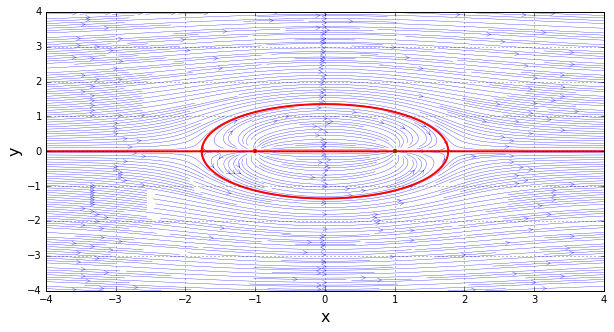

In [302]:
Rankine_Oval(20., 1., 3., X, Y, size, xn, x0, yn, y0)

L =  5.59275196453606
W =  2.783512652749597


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


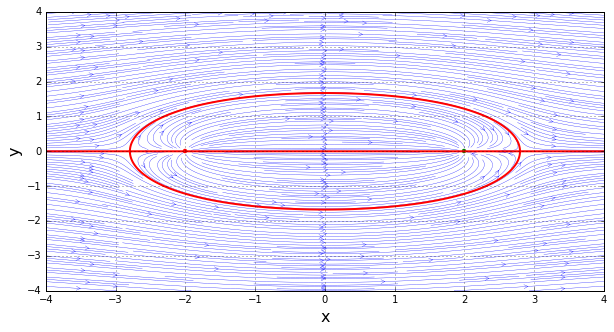

In [303]:
Rankine_Oval(30., 2., 5., X, Y, size, xn, x0, yn, y0)

L =  2.0452625410538148
W =  1.490996392428231


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


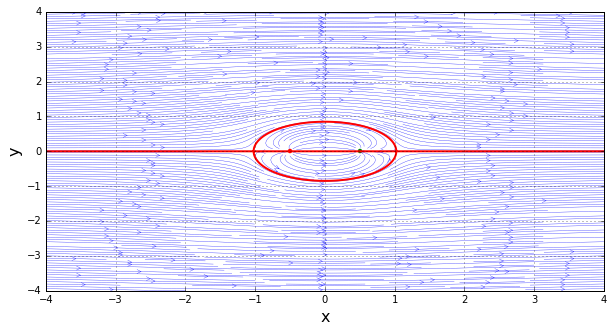

In [304]:
Rankine_Oval(5., 0.5, 1., X, Y, size, xn, x0, yn, y0)

All three examples match the result correctly. However, if we plot the $W(h)$ vs $h$ in range from 0 to infinity, several solutions for $h$ can be found but only one of them is correct. Thus the enumeration range in the code above is set from 10% $x_{stag}$ to $x_{stag}$, and it does not work for some cases such that the width is too close to the edge of mesh area.  

## Problem 4

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


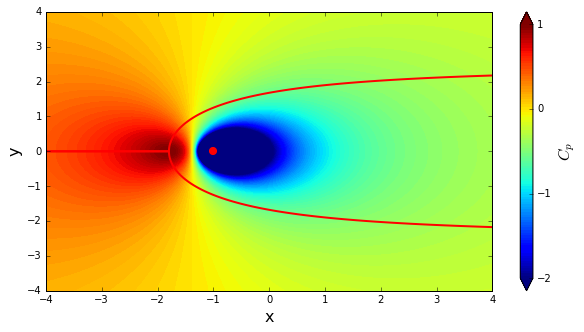

In [312]:
sigma = 5.
u_inf = 1.
sso = sigma 
xso1, yso1 = -1., 0.0 
uso1, vso1 = velocity_field(sso, xso1, yso1, X, Y)
u_freestream = u_inf*np.ones((size, size), dtype = float)
v_freestream = np.zeros((size, size))
u = uso1+u_freestream
v = vso1+v_freestream
C_p = 1.0 - (u**2+v**2)/u_inf**2
fsize = 10
plt.figure(figsize = (fsize,(yn-y0)/(xn-x0)*fsize/2))
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
contf = plt.contourf(X, Y, C_p, levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(xso1, yso1, color='red', s=50, marker='o')
psio = stream_function(sso, xso1, yso1, X, Y)
psi_freestream = u_inf * Y
psi = psi_freestream+psio
plt.contour(X, Y, psi, levels=[-sigma/2, +sigma/2],colors='red', linewidths=2, linestyles='solid');

Obviously, the highest $C_p$ value locates at the stagnation point while the lowest one locates at the source.